<a href="https://colab.research.google.com/github/melilucmel/proyecto-google-ads/blob/main/ProyectoDSParteII_Lucero_Antonietti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final â€“ Parte II


El proceso siguiÃ³ las etapas vistas en el curso:

// PRIMERA PARTE DEL PROYECTO (primer entrega) //
1. **Limpieza y preparaciÃ³n de datos**, donde se corrigieron fechas, valores monetarios, conversiones y valores faltantes.

2. **ExploraciÃ³n inicial (EDA)**, en la que se detectÃ³ baja correlaciÃ³n directa entre las variables originales y la variable objetivo.

// SEGUNDA PARTE DEL PROYECTO (segunda y presente entrega) //

Importaremos el dataset limpio (resultado de la primera parte) para continuar.

En esta etapa nos enfocaremos en la **aplicaciÃ³n de modelos de Machine Learning para predecir el monto de ventas (Sale_Amount)** a partir de los datos de campaÃ±as de Google Ads.

Para ello, seguiremos las siguientes etapas, vistas en el curso:

3. **SelecciÃ³n y creaciÃ³n de features**, incorporando mÃ©tricas de marketing clave como Clicks, Impressions, Cost, Leads, Conversions, Device, etc.

4. **Entrenamiento de modelos**: se probaron un modelo base (Dummy), una RegresiÃ³n Lineal y un Random Forest.
- **Dummy Regressor** como punto de referencia.
- **RegresiÃ³n Lineal**, como modelo simple y ampliamente utilizado.
- **Random Forest**, como modelo no lineal capaz de capturar interacciones mÃ¡s complejas.

5. **EvaluaciÃ³n de mÃ©tricas** (RÂ², RMSE y MAE) para comparar el desempeÃ±o, asÃ­ como en visualizaciones que permiten comparar los resultados de los modelos.


El **objetivo** en esta segunda parte del proyecto serÃ¡ **evaluar si los algoritmos de Machine Learning pueden aplicarse en un caso prÃ¡ctico de marketing digital para predecir resultados de ventas** con precisiÃ³n.

## 0) HipÃ³tesis

**HipÃ³tesis nula (H0):**
Las variables de las campaÃ±as de Google Ads (Clicks, Impressions, Cost, Conversions, Leads, etc.) no tienen capacidad predictiva suficiente para estimar con precisiÃ³n el monto de ventas (Sale_Amount).

**HipÃ³tesis alternativa (H1):**
Las variables de las campaÃ±as de Google Ads (Clicks, Impressions, Cost, Conversions, Leads, etc.) permiten construir un modelo predictivo capaz de superar el desempeÃ±o del Dummy Regressor, reduciendo los errores y aumentando el RÂ².

## 1) Carga y exploraciÃ³n el dataset

In [1]:
import pandas as pd

# Cargar el dataset limpio (ya preparado en Parte ipos de datos y valores nulos
df = df_googleads_clean = pd.read_csv("https://raw.githubusercontent.com/melilucmel/proyecto-google-ads/refs/heads/main/DataSetII_GoogleAds_Clean.csv")

print("//Info general//\n")
print(df.info())

print("\n//Primeras filas//\n")
print(df.head())

print("\n//Valores nulos por columna//\n")
print(df.isnull().sum())

//Info general//

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Ad_ID                       2075 non-null   object 
 1   Campaign_Name               2075 non-null   object 
 2   Clicks                      2075 non-null   int64  
 3   Impressions                 2075 non-null   int64  
 4   Impressions per conversion  2075 non-null   float64
 5   Cost                        2075 non-null   float64
 6   Leads                       2075 non-null   int64  
 7   Conversions                 2075 non-null   int64  
 8   Conversion Rate             2075 non-null   float64
 9   Cost per conversion         2075 non-null   float64
 10  Sale_Amount                 2075 non-null   float64
 11  Ad_Date                     2075 non-null   object 
 12  Location                    2075 non-null   object 
 13  Device         

## 2) DefiniciÃ³n de target y features (X e y)

In [2]:
# Defino Target
TARGET = "Sale_Amount"

# Seleccionamos columnas relevantes (ajustaremos despuÃ©s con Feature Selection)
features_iniciales = [
    "Cost", "Clicks", "Impressions", "Leads", "Conversions", "Device"
]

X = df[features_iniciales]
y = df[TARGET]

print("Dimensiones de X:", X.shape)
print("Dimensiones de y:", y.shape)

Dimensiones de X: (2075, 6)
Dimensiones de y: (2075,)


## 3) Feature Selection

En esta secciÃ³n aplicamos dos enfoques simples y vistos en clase para priorizar variables:

3.a) **CorrelaciÃ³n** con el target (`Sale_Amount`) para variables numÃ©ricas.

3.b) **Importancia de variables con RandomForest** (incluye categÃ³ricas mediante One-Hot).

### 3.a) CorrelaciÃ³n con el target

//CorrelaciÃ³n con Sale_Amount//
Sale_Amount                   1.000000
Clicks                        0.037701
Cost per conversion           0.015910
Impressions                   0.010249
Impressions per conversion    0.010052
Leads                         0.007158
Cost                          0.007085
Conversions                  -0.017356
Conversion Rate              -0.051156
Name: Sale_Amount, dtype: float64


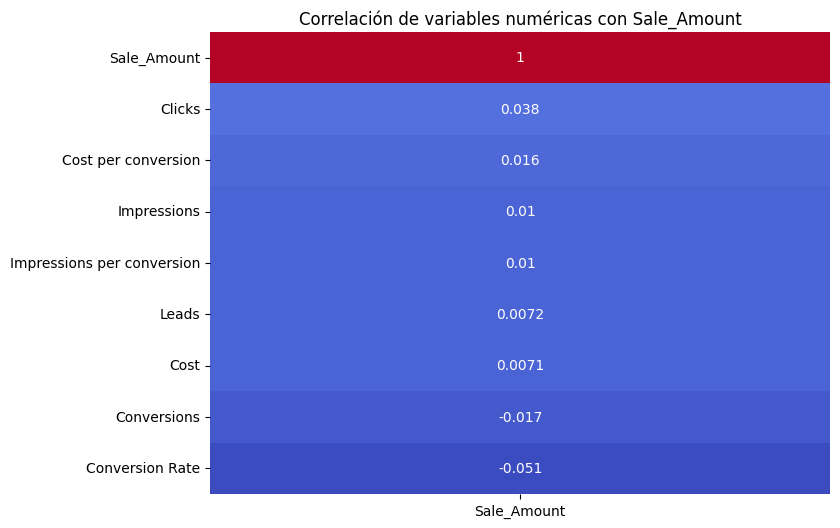

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionamos solo columnas numÃ©ricas
num_cols = df.select_dtypes(include=["float64", "int64", "Int64"]).columns.tolist()

# Matriz de correlaciÃ³n
corr = df[num_cols].corr()

# CorrelaciÃ³n de cada variable con el target Sale_Amount
corr_target = corr["Sale_Amount"].sort_values(ascending=False)

print("//CorrelaciÃ³n con Sale_Amount//")
print(corr_target)

# GrÃ¡fico de calor (top variables)
plt.figure(figsize=(8,6))
sns.heatmap(corr_target.to_frame(), annot=True, cmap="coolwarm", cbar=False)
plt.title("CorrelaciÃ³n de variables numÃ©ricas con Sale_Amount")
plt.show()

### 3.b) Importancia de variables con RandomForest

//Importancia de variables (RandomForest)//
Impressions       0.250502
Cost              0.248669
Clicks            0.204508
Leads             0.141109
Conversions       0.094713
Device_desktop    0.021599
Device_tablet     0.020777
Device_mobile     0.018123
dtype: float64


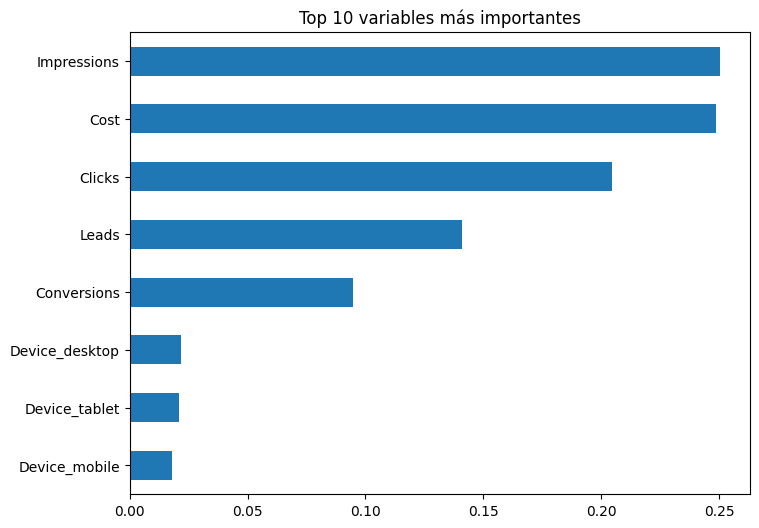

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import pandas as pd

# Features: numÃ©ricas y categÃ³ricas
num_cols = ["Cost", "Clicks", "Impressions", "Leads", "Conversions"]
cat_cols = ["Device"]

# Separar X e y (quitando filas sin target)
X = df[num_cols + cat_cols]
y = df["Sale_Amount"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Preprocesamiento: imputar medianas en numÃ©ricas + OneHot en categÃ³ricas
preprocessor = ColumnTransformer(
    transformers=[
        ("num", SimpleImputer(strategy="median"), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

# Modelo
rf = RandomForestRegressor(n_estimators=200, random_state=42)

# Pipeline
pipe = Pipeline(steps=[("preprocessor", preprocessor),
                       ("model", rf)])

pipe.fit(X_train, y_train)

# Importancia de variables
feature_names = num_cols + list(pipe.named_steps["preprocessor"].transformers_[1][1].get_feature_names_out(cat_cols))
importances = pd.Series(pipe.named_steps["model"].feature_importances_, index=feature_names).sort_values(ascending=False)

print("//Importancia de variables (RandomForest)//")
print(importances)

# GrÃ¡fico
plt.figure(figsize=(8,6))
importances.head(10).sort_values().plot(kind="barh")
plt.title("Top 10 variables mÃ¡s importantes")
plt.show()

## 4) Modelado y evaluaciÃ³n de modelos

### 4.a) PreparaciÃ³n de datos (X, y, train/test)

In [5]:
from sklearn.model_selection import train_test_split

# Variables mÃ¡s relevantes segÃºn RandomForest
features_finales = ["Impressions", "Cost", "Clicks", "Leads", "Conversions"]

X = df[features_finales]
y = df["Sale_Amount"]

# DivisiÃ³n en train (80%) y test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Dimensiones X_train:", X_train.shape)
print("Dimensiones X_test:", X_test.shape)

Dimensiones X_train: (1660, 5)
Dimensiones X_test: (415, 5)


### 4.b) DefiniciÃ³n de funciÃ³n de evaluaciÃ³n (mÃ©tricas)

In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluar_modelo(nombre, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    print(f"=== {nombre} ===")
    print(f"RÂ²:   {r2:.4f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE:  {mae:.2f}\n")
    return {"Modelo": nombre, "RÂ²": r2, "RMSE": rmse, "MAE": mae}

### 4.c) Entrenar y evaluar los tres modelos

In [7]:
# Dummy Regressor (baseline)
from sklearn.dummy import DummyRegressor

dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)

res_dummy = evaluar_modelo("Dummy", y_test, y_pred_dummy)

=== Dummy ===
RÂ²:   -0.0006
RMSE: 285.06
MAE:  240.46



In [8]:
# Linear Regression
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_lin = linreg.predict(X_test)

res_lin = evaluar_modelo("Linear Regression", y_test, y_pred_lin)

=== Linear Regression ===
RÂ²:   -0.0006
RMSE: 285.05
MAE:  240.98



In [9]:
# RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

res_rf = evaluar_modelo("Random Forest", y_test, y_pred_rf)

=== Random Forest ===
RÂ²:   -0.0132
RMSE: 286.84
MAE:  241.62



### 4.d) Guardado y ComparaciÃ³n de resultados

In [10]:
# Guardamos todas las mÃ©tricas en un DataFrame
resultados_mod = resultados = pd.DataFrame([res_dummy, res_lin, res_rf])
print(resultados)

              Modelo        RÂ²        RMSE         MAE
0              Dummy -0.000649  285.057568  240.461163
1  Linear Regression -0.000623  285.053986  240.981305
2      Random Forest -0.013170  286.835535  241.619133


### 4.e) Control con grÃ¡ficos

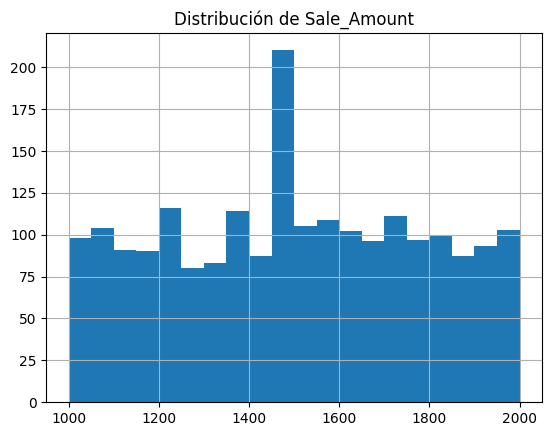

In [11]:
df["Sale_Amount"].hist(bins=20)
plt.title("DistribuciÃ³n de Sale_Amount")
plt.show()

El grÃ¡fico nos muestra que:

1. Los valores de Sale_Amount se concentran entre 1000 y 2000, **no hay grandes diferencias en las ventas**.

2. Hay solo un pico fuerte en los 1500.

3. Excepto por ese pico, la distribuciÃ³n es relativamente plana, sin grandes concentraciones en valores extremos.

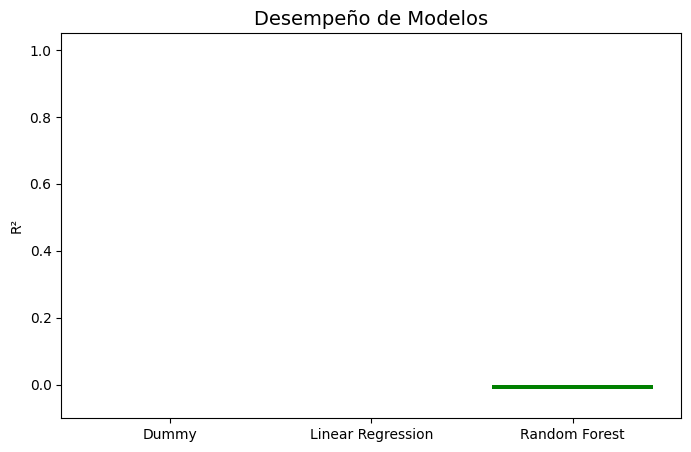

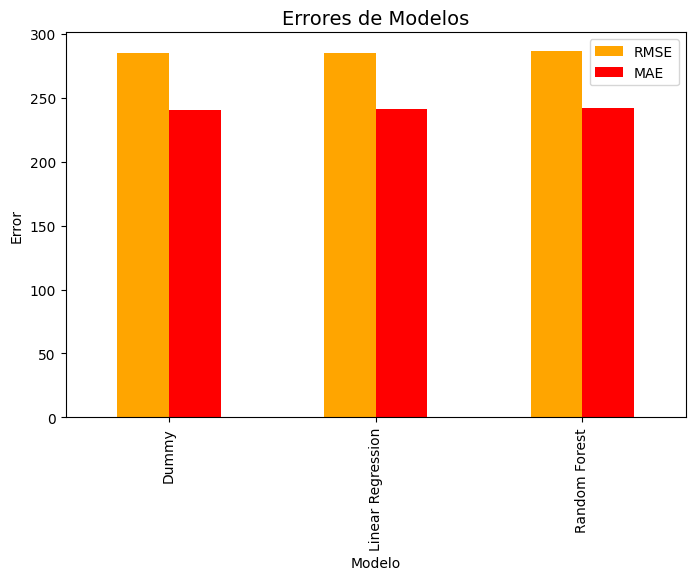

In [12]:
import matplotlib.pyplot as plt

# Resultados finales
resultados_mod_plot = resultados_mod.copy()

# GrÃ¡fico de barras para RÂ²
plt.figure(figsize=(8,5))
plt.bar(resultados_mod_plot["Modelo"], resultados_mod_plot["RÂ²"], color=["gray", "blue", "green"])
plt.title("DesempeÃ±o de Modelos", fontsize=14)
plt.ylabel("RÂ²")
plt.ylim(-0.1, 1.05)
plt.show()

# GrÃ¡fico de barras para RMSE y MAE
resultados_mod_plot.set_index("Modelo")[["RMSE", "MAE"]].plot(
    kind="bar", figsize=(8,5), color=["orange", "red"])
plt.title("Errores de Modelos", fontsize=14)
plt.ylabel("Error")
plt.show()

**AnÃ¡lisis de resultados de los modelos respecto a el grÃ¡fico de Sale_Ammount**: los modelos no superan al Dummy.

ðŸ‘‰ Nuestra media de Sale_Amount del set de entrenamiento, ronda en 1500.

ðŸ‘‰ Resultados con variables seleccionadas:
- Dummy: RÂ² = -0.0006, RMSE â‰ˆ 285, MAE â‰ˆ 240

- Linear Regression: RÂ² = -0.0006, RMSE â‰ˆ 285, MAE â‰ˆ 241

- Random Forest: RÂ² = -0.0131, RMSE â‰ˆ 287, MAE â‰ˆ 242

ðŸ‘‰ RÂ² cercano a 0 o negativo, todos los modelos rinden igual o peor que el Dummy.

ðŸ‘‰ Errores (RMSE y MAE) altos y similares entre Dummy, RegresiÃ³n y Random Forest.

ðŸ‘‰ Con estas variables, los modelos no muestran la variabilidad de Sale_Amount con los features.

#//Parte B// PredicciÃ³n de Conversion Rate

En esta segunda parte se reformula el objetivo del proyecto: **como no fue posible superar el baseline al predecir Sale_Amount, se decide cambiar el target** para continuar con el objeto prÃ¡ctico del proyecto **y predecir la tasa de conversiÃ³n (Conversion Rate)**, una mÃ©trica clave en marketing digital. Se documentan hipÃ³tesis, preparaciÃ³n de datos, modelos entrenados, mÃ©tricas y conclusiones.

## 5) Nuevas HipÃ³tesis

- **H0**: Las variables disponibles no permiten superar al modelo Dummy en la predicciÃ³n del Conversion Rate.
- **H1**: Al entrenar modelos con variables adecuadas, se logra superar al Dummy en la predicciÃ³n del Conversion Rate

## 6) CreaciÃ³n de nuevas features

SelecciÃ³n de features seguras (sin fuga de datos). Se usarÃ¡n Ãºnicamente variables numÃ©ricas que no derivan del target. Quedan excluidas las categÃ³ricas (Device, Location, etc.) en este primer pase.

In [13]:
target = "Conversion Rate"

features_cr = [
    "Impressions",
    "Clicks",
    "Cost",
    "Leads",
    "Conversions",
    "Cost per conversion",
    "Impressions per conversion"
]

X = df[features_cr].copy()
y = df[target].astype(float)

# Limpieza rÃ¡pida
X = X.replace([np.inf, -np.inf], np.nan)

### 6.a) Train / Test split

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1660, 7) (415, 7) (1660,) (415,)


### 5.b) RedefiniciÃ³n de funciÃ³n de evaluaciÃ³n (mÃ©tricas)

In [18]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

def evaluar_modelo(nombre, modelo, X_train, X_test, y_train, y_test):
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    print(f"=== {nombre} ===")
    print(f"RÂ²:   {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE:  {mae:.4f}\n")

    return {"Modelo": nombre, "RÂ²": r2, "RMSE": rmse, "MAE": mae}

### 5.c) Entrenamiento y EvaluaciÃ³n de modelos

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

resultados_cr = []

# Dummy
pipe_dummy = Pipeline([("imp", SimpleImputer(strategy="median")),
                       ("model", DummyRegressor(strategy="mean"))])
resultados_cr.append(evaluar_modelo("Dummy (CR)", pipe_dummy, X_train, X_test, y_train, y_test))

# Linear Regression
pipe_lin = Pipeline([("imp", SimpleImputer(strategy="median")),
                     ("sc", StandardScaler()),
                     ("model", LinearRegression())])
resultados_cr.append(evaluar_modelo("Linear Regression (CR)", pipe_lin, X_train, X_test, y_train, y_test))

# Ranfom Forest
pipe_rf = Pipeline([("imp", SimpleImputer(strategy="median")),
                    ("model", RandomForestRegressor(n_estimators=300, random_state=42))])
resultados_cr.append(evaluar_modelo("Random Forest (CR)", pipe_rf, X_train, X_test, y_train, y_test))

df_resultados_cr = pd.DataFrame(resultados_cr)

=== Dummy (CR) ===
RÂ²:   -0.0004
RMSE: 0.0175
MAE:  0.0120

=== Linear Regression (CR) ===
RÂ²:   0.5078
RMSE: 0.0123
MAE:  0.0092

=== Random Forest (CR) ===
RÂ²:   0.5195
RMSE: 0.0121
MAE:  0.0089



**Resultados observados**:
Resumen reportado en las corridas del experimento sobre el dataset limpio:
â€¢ Dummy (CR) â€” RÂ² â‰ˆ -0.0004, RMSE â‰ˆ 0.017â€“0.020, MAE â‰ˆ 0.012
â€¢ Linear Regression (CR) â€” RÂ² â‰ˆ 0.507, RMSE â‰ˆ 0.012, MAE â‰ˆ 0.009
â€¢ Random Forest (CR) â€” RÂ² â‰ˆ 0.519, RMSE â‰ˆ 0.012, MAE â‰ˆ 0.009

### 5.d) Guardado y ComparaciÃ³n de resultados

In [27]:
df_resultados_cr = pd.DataFrame(resultados_cr)
print(df_resultados_cr)

                   Modelo        RÂ²      RMSE       MAE
0              Dummy (CR) -0.000419  0.017482  0.011956
1  Linear Regression (CR)  0.507813  0.012262  0.009157
2      Random Forest (CR)  0.519505  0.012115  0.008946


**ObservaciÃ³n:** Los algoritmos de RegresiÃ³n Lineal y Random Forest no logran superar al modelo de referencia (Dummy).

### 5.e) Control con grÃ¡ficos

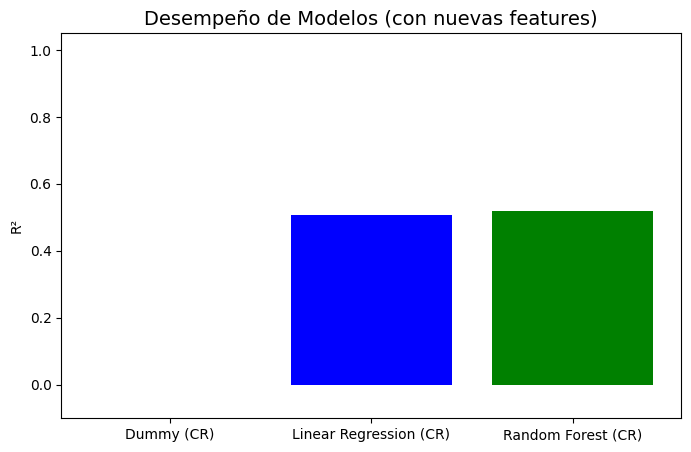

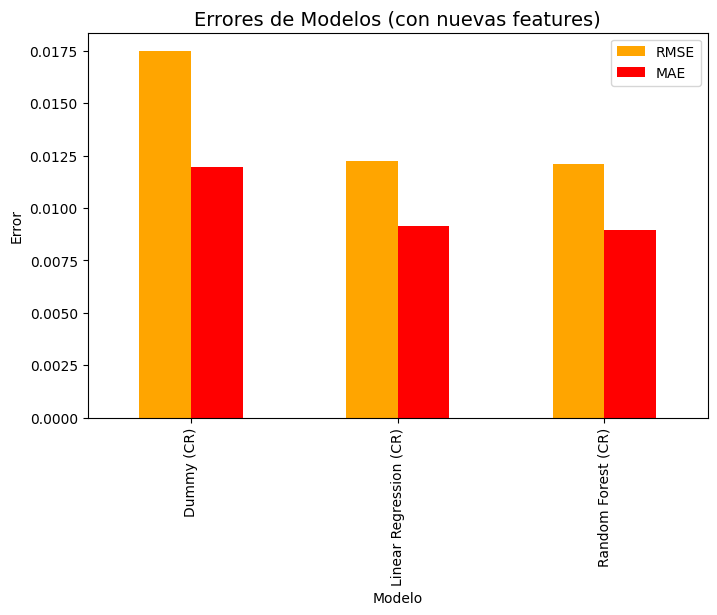

In [28]:
import matplotlib.pyplot as plt

# Resultados finales
df_resultados_cr_plot = df_resultados_cr.copy()

# GrÃ¡fico de barras para RÂ²
plt.figure(figsize=(8,5))
plt.bar(df_resultados_cr_plot["Modelo"], df_resultados_cr_plot["RÂ²"], color=["gray", "blue", "green"])
plt.title("DesempeÃ±o de Modelos (con nuevas features)", fontsize=14)
plt.ylabel("RÂ²")
plt.ylim(-0.1, 1.05)
plt.show()

# GrÃ¡fico de barras para RMSE y MAE
df_resultados_cr_plot.set_index("Modelo")[["RMSE", "MAE"]].plot(
    kind="bar", figsize=(8,5), color=["orange", "red"])
plt.title("Errores de Modelos (con nuevas features)", fontsize=14)
plt.ylabel("Error")
plt.show()

## 6) Resultados observados


Resumen reportado en las corridas del experimento sobre el dataset limpio:
â€¢ Dummy (CR) â€” RÂ² â‰ˆ -0.0004, RMSE â‰ˆ 0.017â€“0.020, MAE â‰ˆ 0.012
â€¢ Linear Regression (CR) â€” RÂ² â‰ˆ 0.507, RMSE â‰ˆ 0.012, MAE â‰ˆ 0.009
â€¢ Random Forest (CR) â€” RÂ² â‰ˆ 0.519, RMSE â‰ˆ 0.012, MAE â‰ˆ 0.009

## 7) ValidaciÃ³n de HipÃ³tesis

Los modelos de RegresiÃ³n Lineal y Random Forest superan al Dummy (baseline): RÂ² pasa de ~0 a ~0.50â€“0.52 y los errores (RMSE/MAE) disminuyen de forma sustancial. Se rechaza H0 y se valida H1.

## 8) Conclusiones

Al redefinir el target a Conversion Rate, los modelos capturan alrededor del 50% de su variabilidad, lo que contrasta con los intentos previos sobre Sale_Amount. La selecciÃ³n del objetivo y de las features resulta determinante para el Ã©xito del modelado.

## 9) LÃ­neas Futuras


1) ValidaciÃ³n cruzada para robustecer resultados.
2) BÃºsqueda de hiperparÃ¡metros y prueba de modelos como XGBoost/GBM.
3) One-Hot Encoding de categÃ³ricas (Device/Location) y evaluaciÃ³n de su aporte.
4) Nuevas features (CPA, ROAS, interacciones) y mÃ¡s datos reales/volumen.
5) Interpretabilidad con SHAP/LIME para entender el aporte de cada variable.